<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Final/Data_Analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
 data_with_labels = pd.read_csv('/content/gdrive/My Drive/project_data/Final/data_with_labels.csv')

In [0]:
data_with_clusters = pd.read_csv(r'/content/gdrive/My Drive/project_data/Final/data_with_clusters')

In [0]:
centroids = pd.read_csv(r'/content/gdrive/My Drive/project_data/Final/centroids.csv')

In [9]:

centroids.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
centroids

,Unnamed: 0,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
0,3,2.341204,31.803425,5.607074e+72,8.831338,33.463156,9628.450639,8525.104797,8.675824e+112,1.038999e+52,10.942712,1.537855,1.156735,3.659869,3.478081,6058
1,4,2.258284,3.936236,1.678610e+58,5.285873,3.777117,133.288407,68.062240,4.311900e+108,1.206930e+59,7.880966,1.187910,1.157890,0.747344,0.765792,5055
2,0,2.359163,2.647154,4.571589e+63,14.401993,3.059059,18427.819386,9542.457883,1.369518e+100,1.264495e+37,10.464282,2.385985,1.237773,0.543323,0.457728,4571
3,1,2.396303,26.922192,6.208685e+52,8.467979,28.948380,142.072141,95.015462,3.027517e+70,2.898303e+39,4.740899,2.053527,1.582932,4.747337,4.421422,4289
4,5,2.735068,72.624743,2.784229e+75,19.690310,85.744765,46812.645831,29236.663634,9.701664e+71,1.726661e+32,14.107585,2.760654,1.700131,6.132410,5.390941,3922
5,6,2.373833,0.349689,4.128216e+53,7.409398,0.323577,81.117342,68.056582,6.714008e+52,1.356053e+31,2.898296,2.209593,1.733931,0.144574,0.152562,3836
6,2,2.841012,12.333790,1.716429e+71,8.594472,11.142994,248.502372,85.611735,4.053347e+69,1.146172e+50,18.530041,1.488555,1.713703,1.123817,1.191834,2392


In [0]:
df_radar = centroids

In [0]:
df_radar['label'] = df_radar.index

In [0]:
df_radar = df_radar.reset_index()

In [0]:
df_radar.set_index('label', inplace=True)

In [0]:
df_radar[df_radar<0] = 0

In [0]:
#log scale
df_radar = np.log1p(df_radar)+1

In [22]:
df_radar

,index,Unnamed: 0,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
label,,,,,,,,,,,,,,,,,
0,1.000000,2.386294,2.206331,4.490533,168.510156,3.285575,4.539891,10.172581,10.050888,261.050071,120.772682,3.480121,1.931319,1.768596,2.538987,2.499195,9.709300
1,1.693147,2.609438,2.181201,2.596603,135.067901,2.838305,2.563837,5.899990,5.235008,251.140569,137.040600,3.183910,1.782947,1.769131,1.558097,1.568599,9.528331
2,2.098612,1.000000,2.211692,2.293947,147.582722,3.734497,2.400951,10.821671,10.163611,231.572968,86.430321,3.439236,2.219645,1.805481,1.433938,1.376879,9.427706
3,2.386294,1.693147,2.222688,4.329422,122.560374,3.247915,4.399475,5.963349,5.564509,163.288699,91.864944,2.747616,2.116297,1.948925,2.748737,2.690358,9.364042
4,2.609438,2.791759,2.317766,5.298981,174.717853,4.029665,5.462970,11.753930,11.283213,166.755839,75.228913,3.715197,2.324593,1.993300,2.964649,2.854882,9.274612
5,2.791759,2.945910,2.216050,1.299874,124.454855,3.129350,1.280338,5.408149,5.234926,122.638621,72.684716,2.360539,2.166144,2.005741,1.135032,1.141987,9.252446
6,2.945910,2.098612,2.345736,3.590301,165.023788,3.261187,3.496752,6.519468,5.461435,161.277914,116.265682,3.971954,1.911702,1.998314,1.753215,1.784738,8.780303


In [23]:
df_radar = df_radar.drop("Unnamed: 0",axis = 1,"")
df_radar

,index,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
label,,,,,,,,,,,,,,,,
0,1.000000,2.206331,4.490533,168.510156,3.285575,4.539891,10.172581,10.050888,261.050071,120.772682,3.480121,1.931319,1.768596,2.538987,2.499195,9.709300
1,1.693147,2.181201,2.596603,135.067901,2.838305,2.563837,5.899990,5.235008,251.140569,137.040600,3.183910,1.782947,1.769131,1.558097,1.568599,9.528331
2,2.098612,2.211692,2.293947,147.582722,3.734497,2.400951,10.821671,10.163611,231.572968,86.430321,3.439236,2.219645,1.805481,1.433938,1.376879,9.427706
3,2.386294,2.222688,4.329422,122.560374,3.247915,4.399475,5.963349,5.564509,163.288699,91.864944,2.747616,2.116297,1.948925,2.748737,2.690358,9.364042
4,2.609438,2.317766,5.298981,174.717853,4.029665,5.462970,11.753930,11.283213,166.755839,75.228913,3.715197,2.324593,1.993300,2.964649,2.854882,9.274612
5,2.791759,2.216050,1.299874,124.454855,3.129350,1.280338,5.408149,5.234926,122.638621,72.684716,2.360539,2.166144,2.005741,1.135032,1.141987,9.252446
6,2.945910,2.345736,3.590301,165.023788,3.261187,3.496752,6.519468,5.461435,161.277914,116.265682,3.971954,1.911702,1.998314,1.753215,1.784738,8.780303


In [0]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

In [0]:
ls = list(df_radar)[1:-1]

In [27]:
df_radar.columns

Index(['index', 'no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'no_of_out_transactions', 'tot_ether_sent', 'tot_token_value_recieved',
       'tot_token_value_sent', 'time_b/w_in_txn', 'time_b/w_out_txn',
       'active_months', 'monthly_out_txn', 'monthly_in_txn',
       'monthly_ether_sent', 'monthly_ether_recieved', 'cluster_size'],
      dtype='object')

In [0]:
feats = ['no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'no_of_out_transactions', 'tot_ether_sent', 'tot_token_value_recieved',
       'tot_token_value_sent', 'time_b/w_in_txn', 'time_b/w_out_txn',
       'active_months', 'monthly_out_txn', 'monthly_in_txn',
       'monthly_ether_sent', 'monthly_ether_recieved' ]

In [0]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [32]:
d

{'active_months': 'J',
 'eth_balance': 'C',
 'monthly_ether_recieved': 'N',
 'monthly_ether_sent': 'M',
 'monthly_in_txn': 'L',
 'monthly_out_txn': 'K',
 'no_of_in_transactions': 'A',
 'no_of_out_transactions': 'D',
 'time_b/w_in_txn': 'H',
 'time_b/w_out_txn': 'I',
 'tot_ether_recieved': 'B',
 'tot_ether_sent': 'E',
 'tot_token_value_recieved': 'F',
 'tot_token_value_sent': 'G'}

In [0]:

dfr = df_radar[feats]

In [0]:
#setting up color map
NUM_COLORS = 7
cmp = plt.get_cmap('viridis', 3)

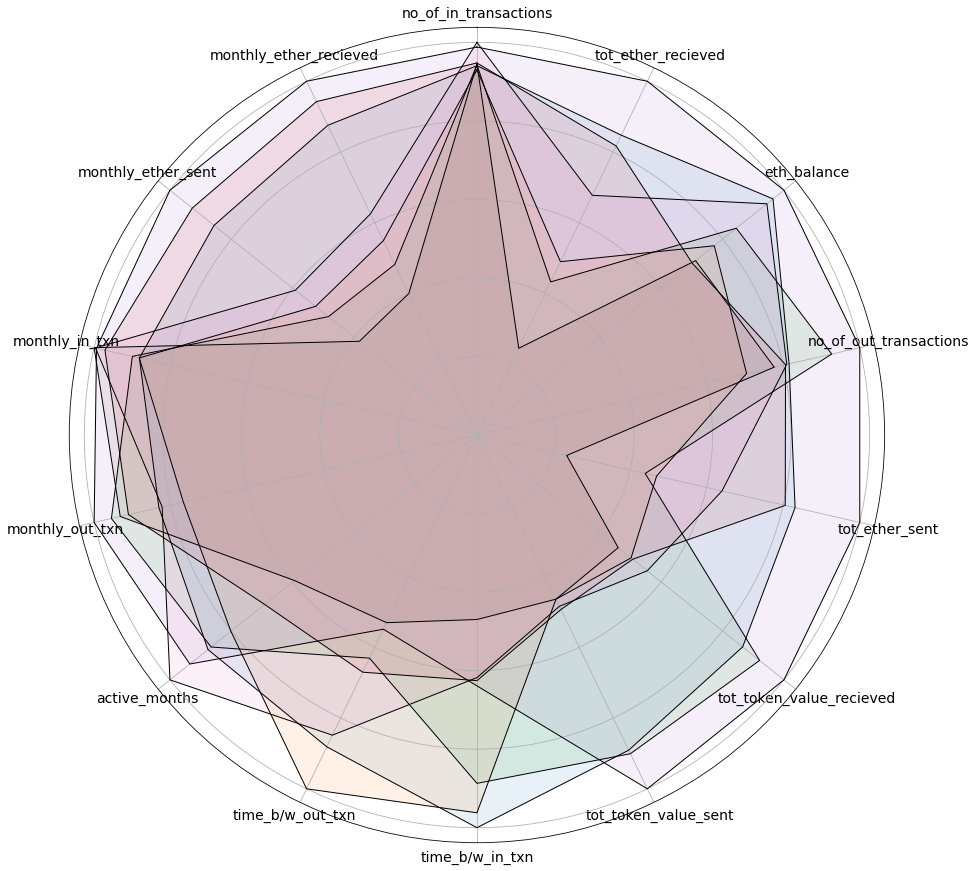

In [53]:
# Libraries
import matplotlib.pyplot as plt

from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
#ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(7):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)
 

In [0]:
labels_ = list(data_with_clusters['labels'])

In [0]:
total_eth = {}
total_addresses = {}

for clust in np.unique(labels_):
    mask = labels_==clust
    eth = np.sum(data_with_clusters[mask]['eth_balance'])
    size = np.sum(labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [0]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [0]:
names
dfr=dfr.loc[names]


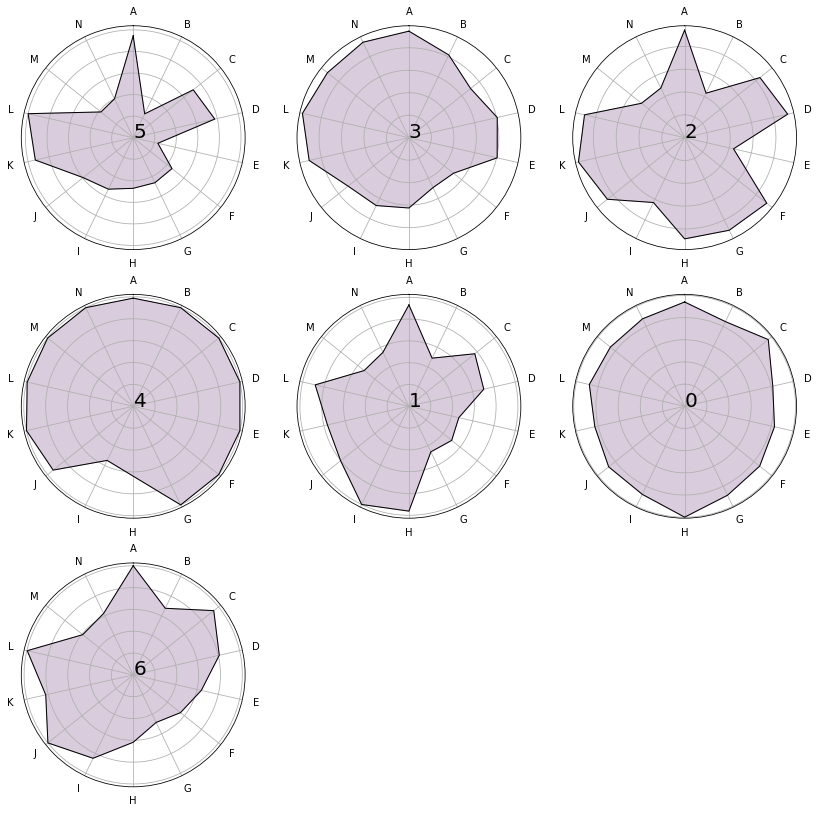

In [95]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(14,14))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(0)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(3,3,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
    fnt=20

    ax.text(1,0, str(lbl), fontsize=fnt)

In [0]:
dfdf = pd.DataFrame(pd.Series(d))

In [56]:
dfdf.sort_values(by=0)

,0
no_of_in_transactions,A
tot_ether_recieved,B
eth_balance,C
no_of_out_transactions,D
tot_ether_sent,E
tot_token_value_recieved,F
tot_token_value_sent,G
time_b/w_in_txn,H
time_b/w_out_txn,I
active_months,J


In [57]:
names

array([5, 3, 2, 4, 1, 0, 6])

In [0]:
dftest=centroids.loc[names]

In [0]:
dftest=dftest[dftest.columns[:-2]]

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cos_sim = cosine_similarity(dftest)

In [0]:

idxs = np.argsort(cos_sim[-1])

In [0]:
test = cos_sim[idxs]

In [0]:
lbls = dftest.index[idxs]

In [68]:
dftest = dftest.drop(['Unnamed: 0'], axis = 1)
dftest

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
5,2.373833,0.349689,4.128216e+53,7.409398,0.323577,81.117342,68.056582,6.714008e+52,1.356053e+31,2.898296,2.209593,1.733931,0.144574,0.152562
3,2.396303,26.922192,6.208685e+52,8.467979,28.948380,142.072141,95.015462,3.027517e+70,2.898303e+39,4.740899,2.053527,1.582932,4.747337,4.421422
2,2.359163,2.647154,4.571589e+63,14.401993,3.059059,18427.819386,9542.457883,1.369518e+100,1.264495e+37,10.464282,2.385985,1.237773,0.543323,0.457728
4,2.735068,72.624743,2.784229e+75,19.690310,85.744765,46812.645831,29236.663634,9.701664e+71,1.726661e+32,14.107585,2.760654,1.700131,6.132410,5.390941
1,2.258284,3.936236,1.678610e+58,5.285873,3.777117,133.288407,68.062240,4.311900e+108,1.206930e+59,7.880966,1.187910,1.157890,0.747344,0.765792
0,2.341204,31.803425,5.607074e+72,8.831338,33.463156,9628.450639,8525.104797,8.675824e+112,1.038999e+52,10.942712,1.537855,1.156735,3.659869,3.478081
6,2.841012,12.333790,1.716429e+71,8.594472,11.142994,248.502372,85.611735,4.053347e+69,1.146172e+50,18.530041,1.488555,1.713703,1.123817,1.191834


In [69]:

idxs

array([2, 4, 5, 1, 0, 3, 6])

In [70]:
lbls

Int64Index([2, 1, 0, 3, 5, 4, 6], dtype='int64')

In [0]:
cmap=cm.get_cmap('YlGnBu')

In [0]:
from matplotlib.colors import LogNorm, PowerNorm

Text(114.0, 0.5, 'Cluster Number')

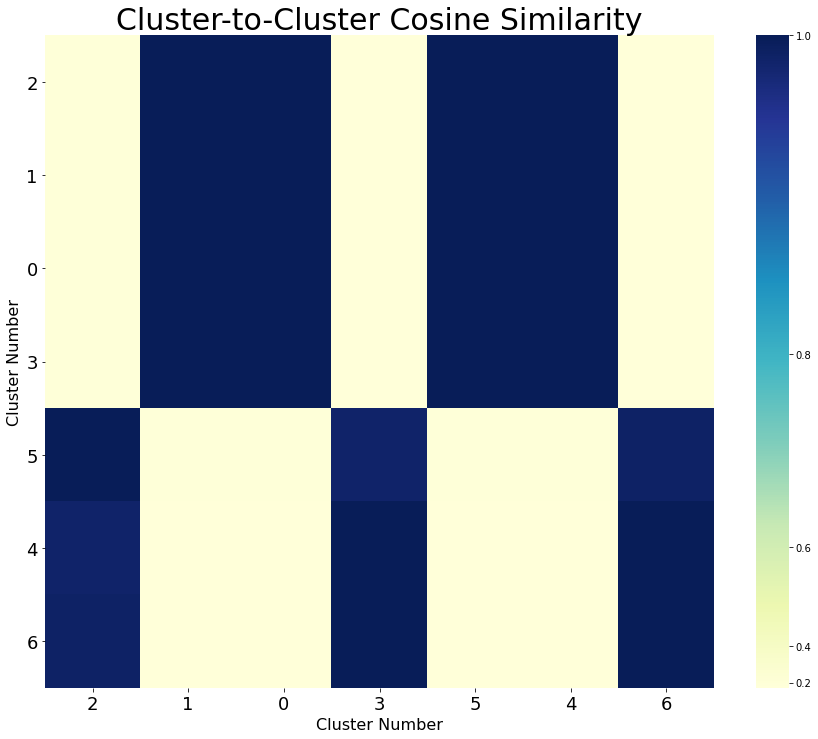

In [73]:
fig = plt.figure(figsize=(15,12))

# sns.heatmap(cos_sim,xticklabels=dftest.index, cmap=cm.get_cmap('Blues'),yticklabels=dftest.index, cbar=False)
sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=0)
plt.xlabel("Cluster Number", fontsize=16)
plt.ylabel("Cluster Number", fontsize=16)

In [0]:
lbls = [2,1,0,3,5,4,6]

In [0]:

dftest2 = dftest.loc[lbls]

In [0]:
cos_sim=cosine_similarity(dftest2)

In [0]:
test=cos_sim

In [78]:
test.shape

(7, 7)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

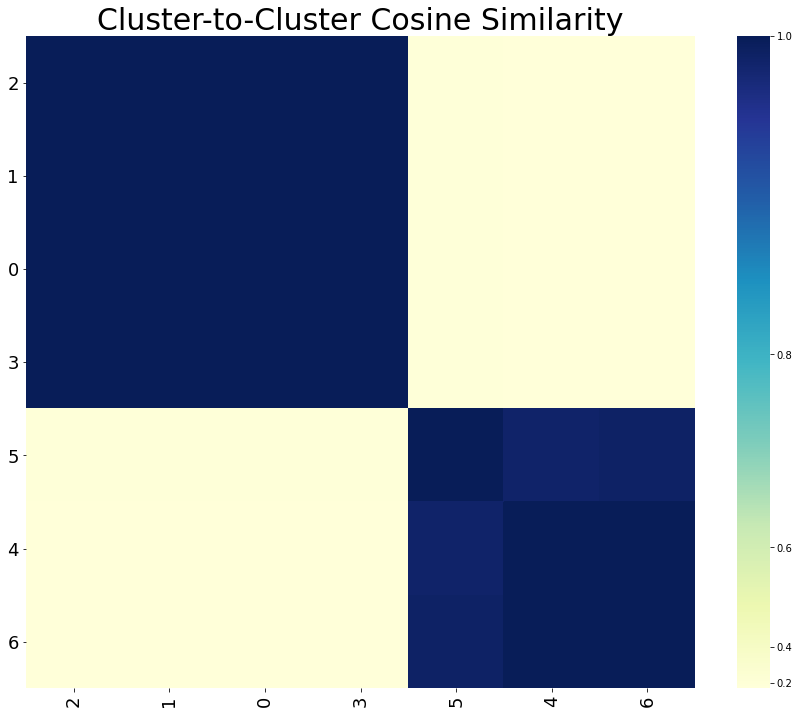

In [79]:

fig = plt.figure(figsize=(15,12))

sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18,rotation=0)

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
ag = AgglomerativeClustering(n_clusters=7)

In [0]:
df_scaled = centroids

In [89]:
df_scaled

,Unnamed: 0,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size,label
0,3,2.341204,31.803425,5.607074e+72,8.831338,33.463156,9628.450639,8525.104797,8.675824e+112,1.038999e+52,10.942712,1.537855,1.156735,3.659869,3.478081,6058,0
1,4,2.258284,3.936236,1.678610e+58,5.285873,3.777117,133.288407,68.062240,4.311900e+108,1.206930e+59,7.880966,1.187910,1.157890,0.747344,0.765792,5055,1
2,0,2.359163,2.647154,4.571589e+63,14.401993,3.059059,18427.819386,9542.457883,1.369518e+100,1.264495e+37,10.464282,2.385985,1.237773,0.543323,0.457728,4571,2
3,1,2.396303,26.922192,6.208685e+52,8.467979,28.948380,142.072141,95.015462,3.027517e+70,2.898303e+39,4.740899,2.053527,1.582932,4.747337,4.421422,4289,3
4,5,2.735068,72.624743,2.784229e+75,19.690310,85.744765,46812.645831,29236.663634,9.701664e+71,1.726661e+32,14.107585,2.760654,1.700131,6.132410,5.390941,3922,4
5,6,2.373833,0.349689,4.128216e+53,7.409398,0.323577,81.117342,68.056582,6.714008e+52,1.356053e+31,2.898296,2.209593,1.733931,0.144574,0.152562,3836,5
6,2,2.841012,12.333790,1.716429e+71,8.594472,11.142994,248.502372,85.611735,4.053347e+69,1.146172e+50,18.530041,1.488555,1.713703,1.123817,1.191834,2392,6


In [0]:
fitag = ag.fit(dftest)

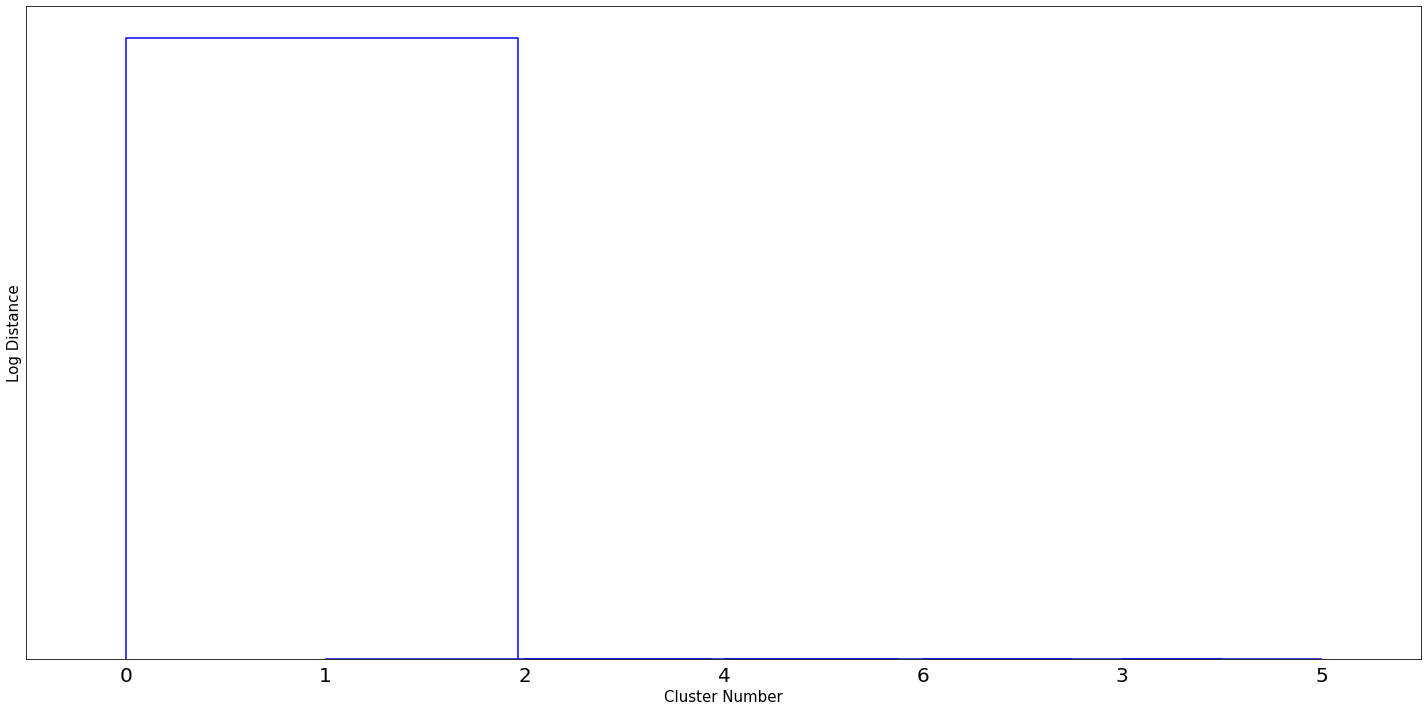

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, method='average',metric='euclidean')
fig=plt.figure(figsize=(25,12))
dendrogram(Z,color_threshold=15) 
# plt.ylim(0,1e8)
# plt.yscale('log')
# plt.ylim(1.5,60)
# plt.title("Cluster Dendrogram", fontsize=30)
plt.ylabel('Log Distance', fontsize=15)
plt.yticks([])
plt.xlabel("Cluster Number", fontsize=15)
plt.xticks(fontsize=20, rotation='horizontal')
plt.show()

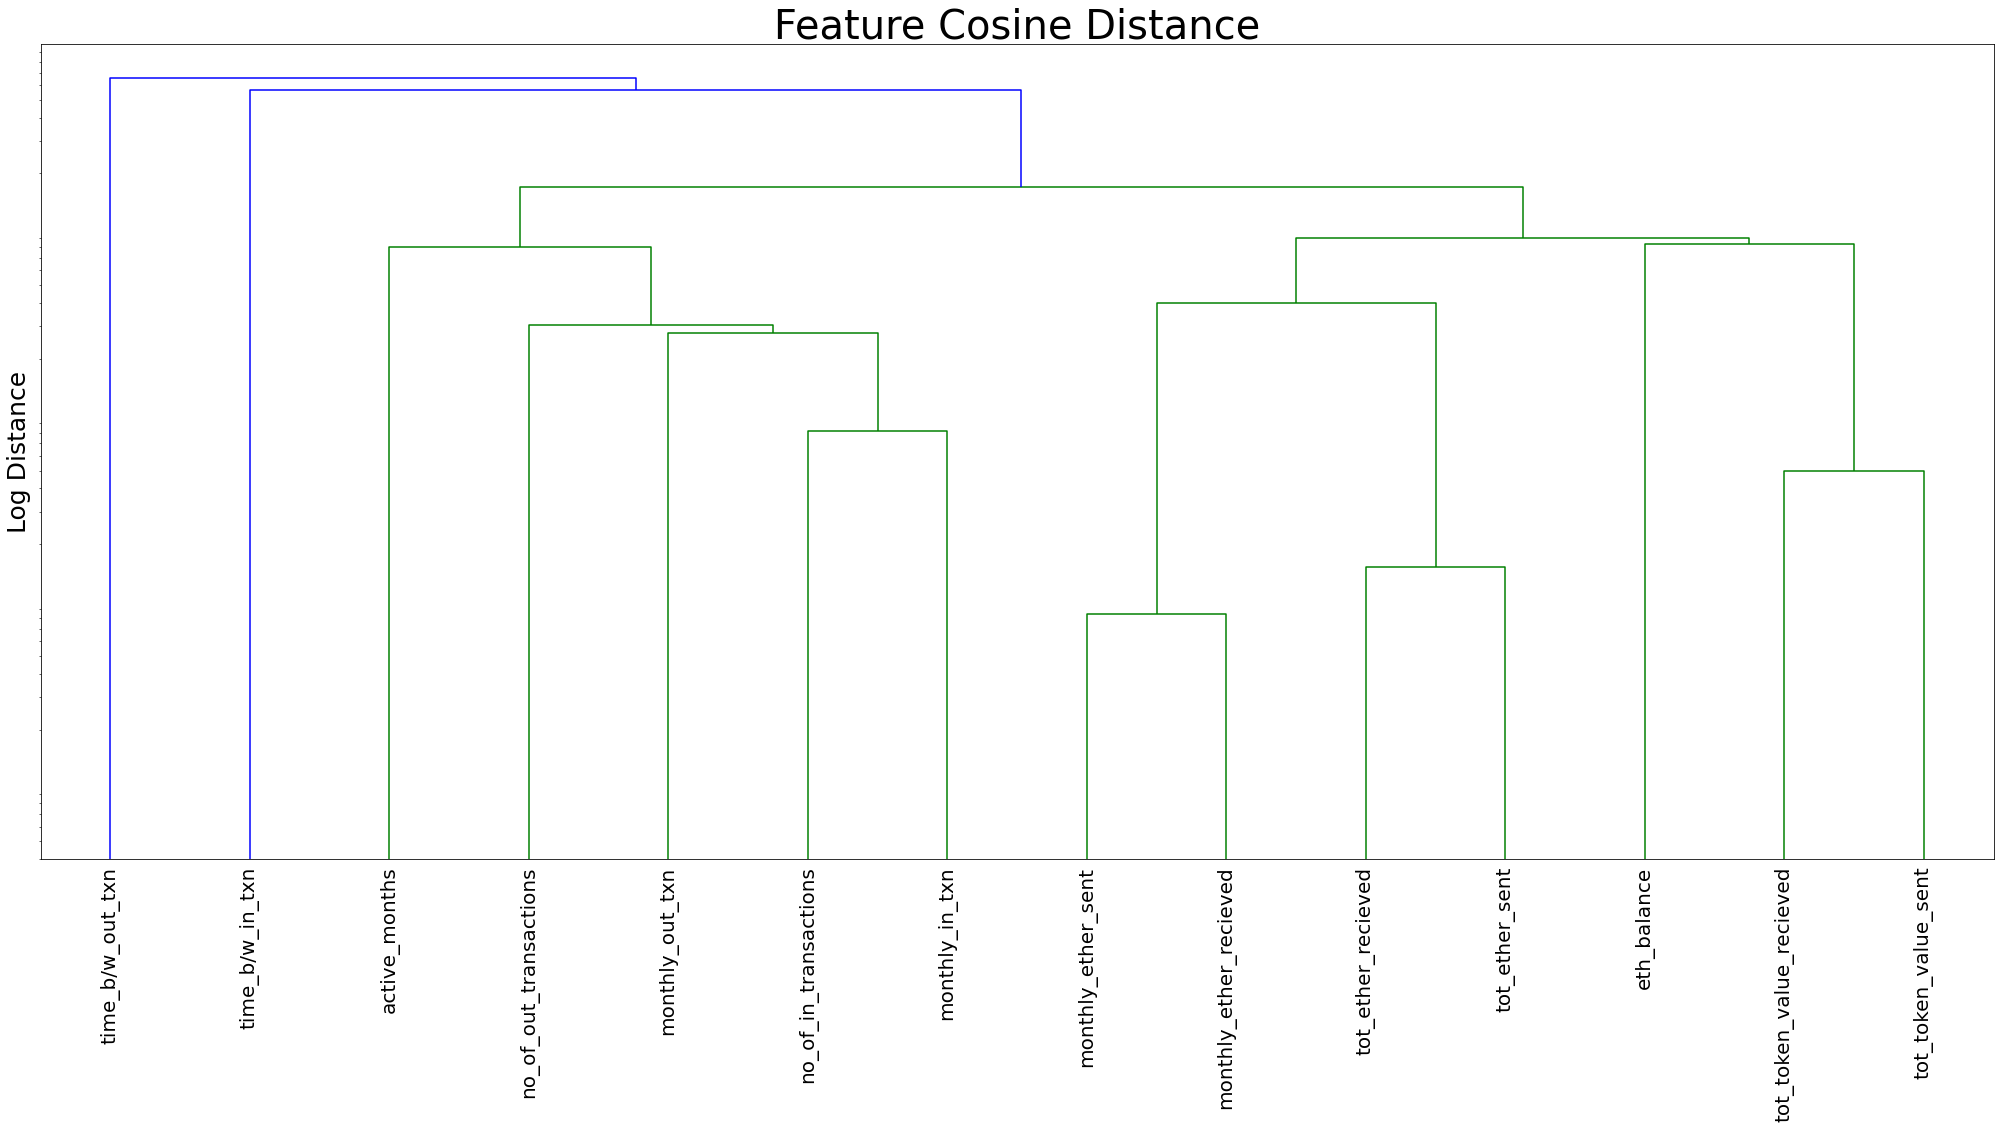

In [88]:
Z = linkage(dftest.T, metric='cosine')
fig=plt.figure(figsize=(35,15))
dendrogram(Z,labels=dftest.columns, color_threshold=.4) 
# plt.ylim(0,1e8)
plt.yscale('log')
plt.ylim(.00004,1)
plt.title("Feature Cosine Distance", fontsize=40)
plt.ylabel('Log Distance', fontsize=25)
plt.yticks([])

plt.xticks(fontsize=20, rotation='vertical')
plt.show()